# Integracion Numerica

Dada una funcion $f(x)$, queremos aproximar la integral de $f(x)$ sobre el intervalo $[a,b]$.  Para hacerlo asumiremos que el intervalo ha sido discretizado en una malla, x, que consiste en $n+1$ puntos con longitud $h=\frac{b-a}{n}$.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

## Integral de Riemann

In [2]:
a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

In [3]:
I_riemannL = h * sum(f[:n-1])
err_riemannL = 2 - I_riemannL

In [4]:
I_riemannR = h * sum(f[1::])
err_riemannR = 2 - I_riemannR

In [5]:
I_mid = h * sum(np.sin((x[:n-1] \
        + x[1:])/2))

In [6]:
err_mid = 2 - I_mid

In [7]:
print(f'Aproximacion por puntos minimos: {I_riemannL}')
print(f'Error de la aproximacion: {err_riemannL}\n')

print(f'Aproximacion por puntos maximos: {I_riemannR}')
print(f'Error de la aproximacion: {err_riemannR}\n')


print(f'Aproximacion por puntos medios: {I_mid}')
print(f'Error de la aproximacion: {err_mid}')

Aproximacion por puntos minimos: 1.9835235375094546
Error de la aproximacion: 0.01647646249054535

Aproximacion por puntos maximos: 1.9835235375094546
Error de la aproximacion: 0.01647646249054535

Aproximacion por puntos medios: 2.0082484079079745
Error de la aproximacion: -0.008248407907974542


## Regla del Trapecio

Para cada subintervalo, la regla del trapecio calcula el area del trapecio con esquinas $(x_i,0)$, $(x_{i+1},0)$, $(x_i,f(x_i))$ y $(x_{i+1},f(x_{i+1}))$, lo cual es $f\dfrac{f(x_i)+f(x_{i+1})}{2}$. Asi, la regla del trapecio aproxima la integral acorde a la expresion:
$$\int_{a}^{b}f(x)\,dx\approx h\sum_{i=0}^{n-1}\dfrac{f(x_i)+f(x_{i+1})}{2}.$$

El orden de la regla del trapecio es $O(h^3)$ para cada subintervalo, mientras que en todo el intervalo es $O(h^2)$.

In [8]:
a = 0
b = np.pi
n = 10
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

In [9]:
I_trap = (h/2)*(f[0] + \
          2 * sum(f[1:n-1]) + f[n-1])
err_trap = 2 - I_trap

In [10]:
print(f'Aproximacion: {I_trap}')
print(f'Error de la aproximacion: {err_trap}')

Aproximacion: 1.9796508112164832
Error de la aproximacion: 0.02034918878351677


## Regla de Simpson

Consideremos dos subintervalos consecutivos $[x_{i-1},x_i]$ y $[x_i,x_{i+1}]$. La regla de Simpson aproxima la integral de $f(x)$ sobre estos dos subintervalos ajustando un polinomio cuadratico sobre los puntos $(x_{i-1},f(x_{i-1}))$, $(x_i,f(x_i))$ y $(x_{i+1},f(x_{i+1}))$, el cual es el unico polinomio cuadratico que verifica estas condiciones, y luego integrando el polinomio cuadratico.

Veamos como se ve en estos dos subintervalos:
$$\int_{x_{i-1}}^{x_{i+1}}f(x)\,dx\approx\dfrac{h}{3}\big(f(x_{i-1})+4f(x_i)+f(x_{i+1})\big),$$
por tanto
$$\int_{a}^{b}f(x)\,dx\approx\dfrac{h}{3}\sum_{i+1}^{n-1}\big(f(x_{i-1})+4f(x_i)+f(x_{i+1})\big).$$

El orden de este metodo es $O(h^5)$ en cada uno de los subintervalos y $O(h^4)$ en todo el intervalo.

In [11]:
a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)


In [12]:
I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

In [13]:
print(f'Aproximacion: {I_simp}')
print(f'Error: {err_simp}')

Aproximacion: 2.0001095173150043
Error: -0.00010951731500430384


## Integrales con Scipy

### Con funcion `trapz`

In [14]:
from scipy.integrate import trapz

In [15]:
a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

In [16]:
I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

In [17]:
print(f'Aproximacion con trapz de scipy: {I_trapz}')
print(f'Aproximacion con el metodo trapecio: {I_trap}')

Aproximacion con trapz de scipy: 1.9835235375094544
Aproximacion con el metodo trapecio: 1.9835235375094546


### Con funcion `cumtrapz`

In [18]:
from scipy.integrate import cumtrapz

In [19]:
x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

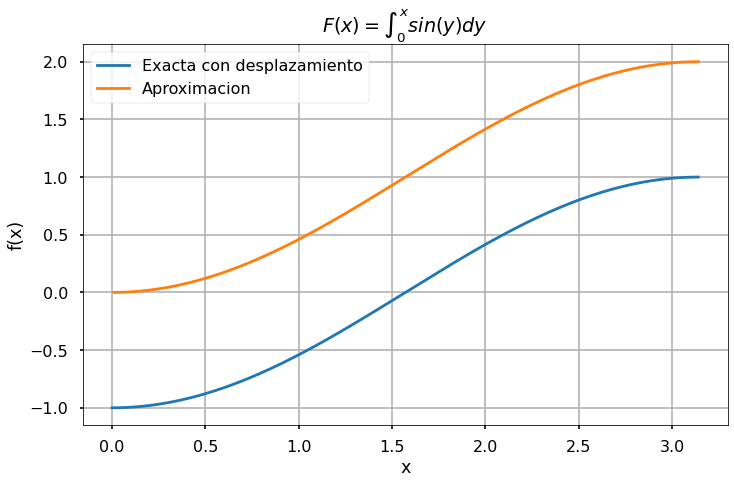

In [20]:
# Comparacion
plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exacta con desplazamiento', 'Aproximacion'])
plt.show()

### Con funcion `quad`

In [21]:
from scipy.integrate import quad 

In [22]:
I_quad, est_err_quad = quad(np.sin, 0, np.pi)
err_quad = 2 - I_quad

In [23]:
print(f'Aproximacion con quad: {I_quad}')
print(f'Error de estimacion de la aproximacion con quad: {est_err_quad}')
print(f'Error calculado: {err_quad}')

Aproximacion con quad: 2.0
Error de estimacion de la aproximacion con quad: 2.220446049250313e-14
Error calculado: 0.0
